In [2]:
import pandas as pd
df = pd.read_csv(r'/content/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


In [9]:
missing_data = df.columns[df.isnull().any()].tolist()
print(missing_data)

[]


No duplecated rows or missing information are detected

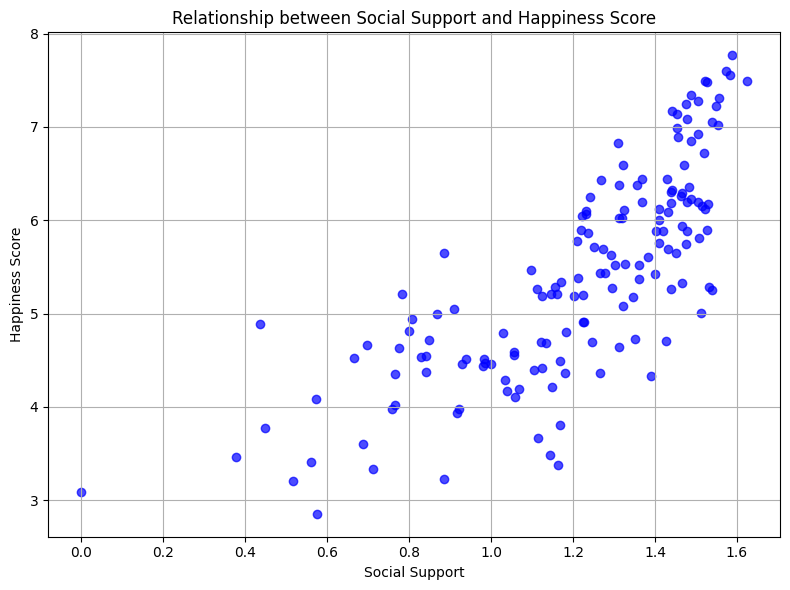

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Social support'], df['Score'], alpha=0.7, color='blue')

plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Relationship between Social Support and Happiness Score')


plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
df['Country or region'].value_counts()

Finland                1
Venezuela              1
Jordan                 1
Benin                  1
Congo (Brazzaville)    1
                      ..
Latvia                 1
South Korea            1
Estonia                1
Jamaica                1
South Sudan            1
Name: Country or region, Length: 156, dtype: int64

Due to the large number of 156 countries, visualizing all of them together in one plot isn't feasible. Therefore, I've chosen to visualize only the top 10 countries.

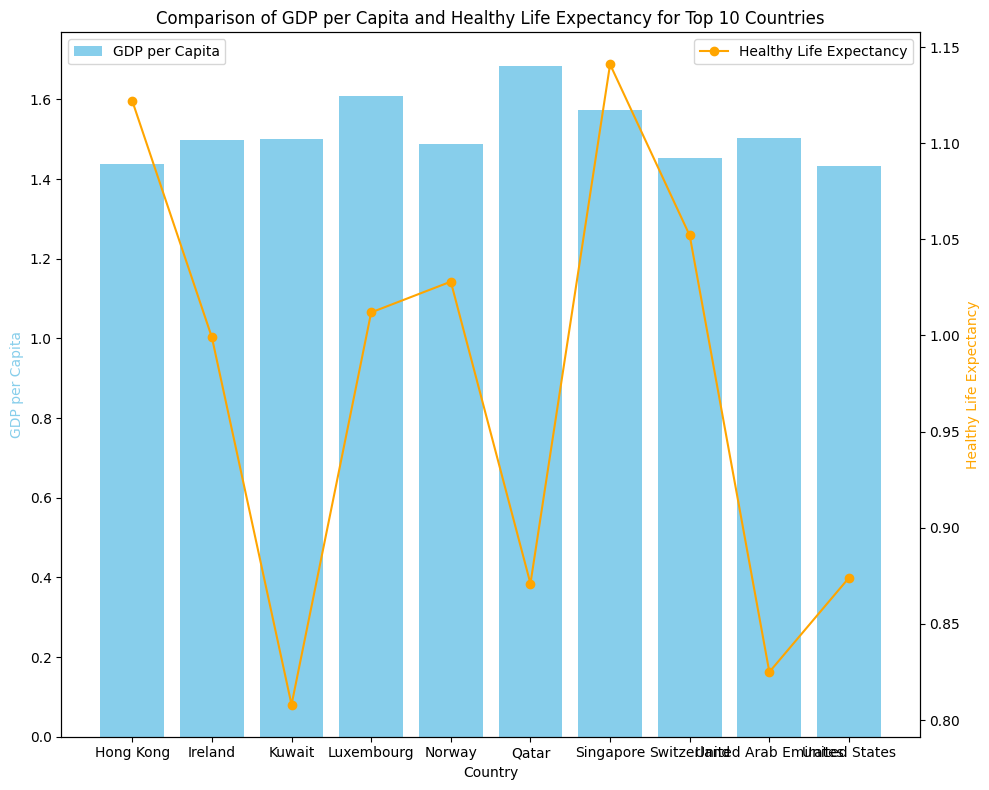

In [24]:
import matplotlib.pyplot as plt

# Sorting data by 'GDP per Capita' to get top 10 countries
top_10_GDP = df.sort_values('GDP per capita', ascending=False).head(10)

# Grouping top 10 countries by region and calculating mean values
top_10_grouped = top_10_GDP.groupby('Country or region').mean()

# Creating subplots for each region
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting GDP per Capita (bar plot)
ax.bar(top_10_grouped.index, top_10_grouped['GDP per capita'], color='skyblue', label='GDP per Capita')

# Creating a secondary y-axis for Healthy Life Expectancy (line plot)
ax2 = ax.twinx()
ax2.plot(top_10_grouped.index, top_10_grouped['Healthy life expectancy'], marker='o', color='orange', label='Healthy Life Expectancy')

# Setting labels and title
ax.set_xlabel('Country')
ax.set_ylabel('GDP per Capita', color='skyblue')
ax2.set_ylabel('Healthy Life Expectancy', color='orange')
ax.set_title('Comparison of GDP per Capita and Healthy Life Expectancy for Top 10 Countries')

# Show legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()